# **Dataset Downloading and Exploration**

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("community-datasets/disaster_response_messages")

# Convert to pandas for easier inspection
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/379k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/388k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21046 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2629 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2573 [00:00<?, ? examples/s]

In [ ]:

# Display dataset structure
print(" ================================ Dataset Info ==============================")
# print(df_train.info())
print(" ================================ Dataset Head ==============================")
# print(df_train.head(1))
# View the first row as a vertical table
print(df_train.iloc[0].transpose())
print(df_train.iloc[1].transpose())

 ================================ Dataset Info ==============================
 ================================ Dataset Head ==============================
split                                                                 train
message                   Weather update - a cold front from Cuba that c...
original                  Un front froid se retrouve sur Cuba ce matin. ...
genre                                                                direct
related                                                                   1
PII                                                                       0
request                                                                   0
offer                                                                     0
aid_related                                                               0
medical_help                                                              0
medical_products                                                          0
search_a

## Pre-processing

In [ ]:
# Check for missing values
missing_summary = df_train.isnull().sum()
print("Missing Values:\n", missing_summary)

# Drop or fill missing values
df_train = df_train.dropna()  # Drop rows with missing values


Missing Values:
 split                     0
message                   0
original                  0
genre                     0
related                   0
PII                       0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
sto

## Dataset after preprocessing

In [ ]:
df_train.shape

(21046, 41)

In [ ]:
# View a few random messages
print(df_train["message"].sample(10))


12247    During this period, due to the prevalence of a...
20593    The shift from more traditional to large scale...
1380                    I need a little information please
1422     People who are living in Sousmalta, by the nat...
17198    Secondary impacts to-date have been confined t...
12998    There are signs that a flow of fresh magma mol...
13534    Plenty of mud finds its way on to the roads ma...
3916     I am from PAP, not in Gonave Island, my house ...
6271     The monney that you send for the country i don...
5045      Toothache,ciamoon orange and fine salt can help 
Name: message, dtype: object


## Word Cloud of Messages

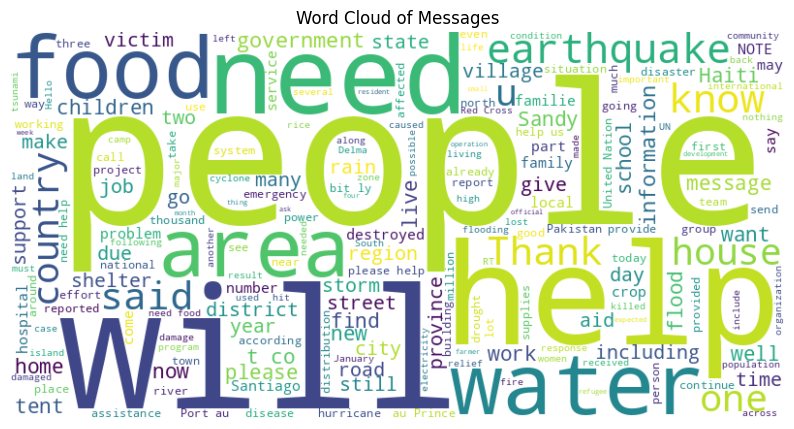

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud of the messages
all_text = " ".join(df_train['message'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Messages")
plt.show()


In [ ]:
import re

# Count URLs
url_pattern = r"http[s]?://\S+"
df_train["contains_url"] = df_train["message"].apply(lambda x: bool(re.search(url_pattern, x)))
print(f"Number of messages containing URLs: {df_train['contains_url'].sum()}")


Number of messages containing URLs: 554


In [ ]:
# Count mentions
mention_pattern = r"@\w+"
df_train["contains_mention"] = df_train["message"].apply(lambda x: bool(re.search(mention_pattern, x)))
print(f"Number of messages containing mentions: {df_train['contains_mention'].sum()}")


Number of messages containing mentions: 428


In [ ]:
# Count hashtags
hashtag_pattern = r"#\w+"
df_train["contains_hashtag"] = df_train["message"].apply(lambda x: bool(re.search(hashtag_pattern, x)))
print(f"Number of messages containing hashtags: {df_train['contains_hashtag'].sum()}")


Number of messages containing hashtags: 816


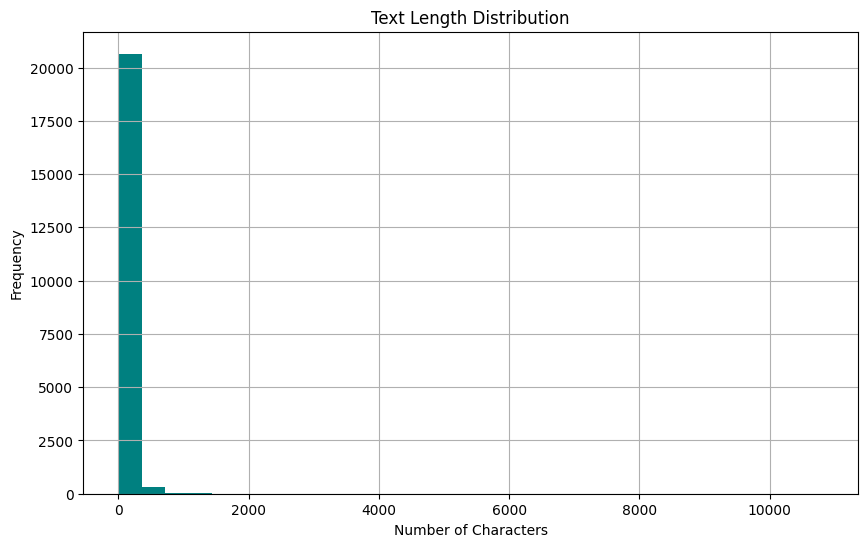

In [ ]:
# Calculate text lengths
df_train["text_length"] = df_train["message"].apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 6))
df_train["text_length"].hist(bins=30, color="teal")
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Noise per genre
genre_noise = df_train.groupby("genre")[["contains_url", "contains_mention", "contains_hashtag"]].mean()
print("Noise Proportion by Genre:\n", genre_noise)


Noise Proportion by Genre:
         contains_url  contains_mention  contains_hashtag
genre                                                   
direct      0.001039          0.001385          0.007039
news        0.006411          0.000670          0.000478
social      0.247668          0.211917          0.388601


## **Training a Multi Label Classification Model & Visualizations**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/379k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/388k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21046 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2629 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2573 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   split                   21046 non-null  object
 1   message                 21046 non-null  object
 2   original                21046 non-null  object
 3   genre                   21046 non-null  object
 4   related                 21046 non-null  int64 
 5   PII                     21046 non-null  int8  
 6   request                 21046 non-null  int64 
 7   offer                   21046 non-null  int8  
 8   aid_related             21046 non-null  int64 
 9   medical_help            21046 non-null  int64 
 10  medical_products        21046 non-null  int64 
 11  search_and_rescue       21046 non-null  int64 
 12  security                21046 non-null  int64 
 13  military                21046 non-null  int64 
 14  child_alone             21046 non-null  int8  
 15  wa

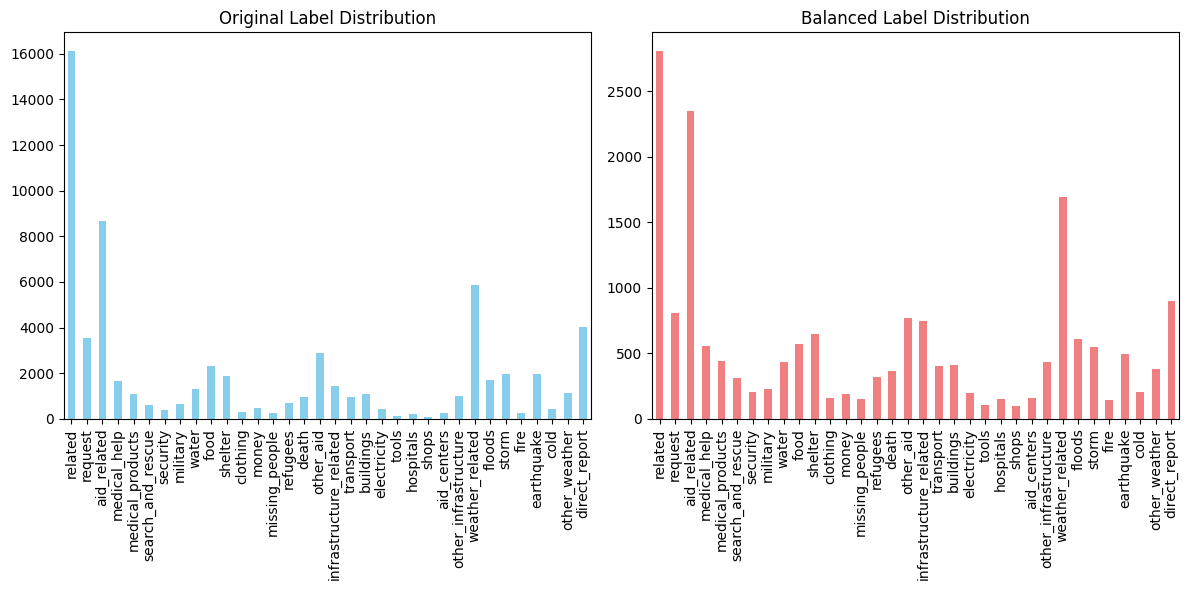


Preprocessing data...

Generating visualizations...


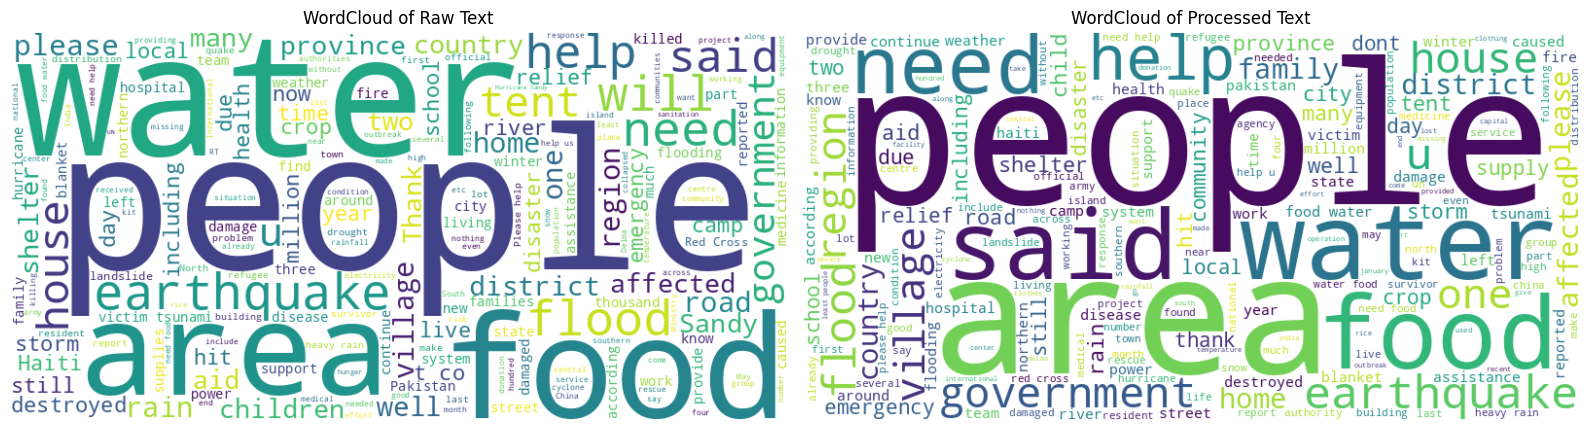

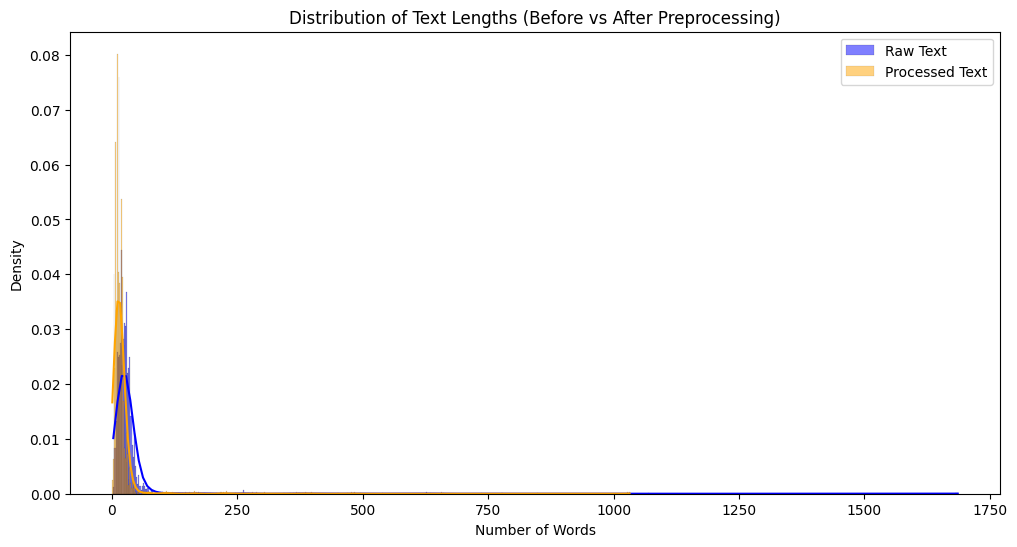

<ipython-input-2-342b15e325b9>:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_common_words_raw, x='Frequency', y='Word', palette='Blues_d')
<ipython-input-2-342b15e325b9>:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_common_words_processed, x='Frequency', y='Word', palette='Oranges_d')


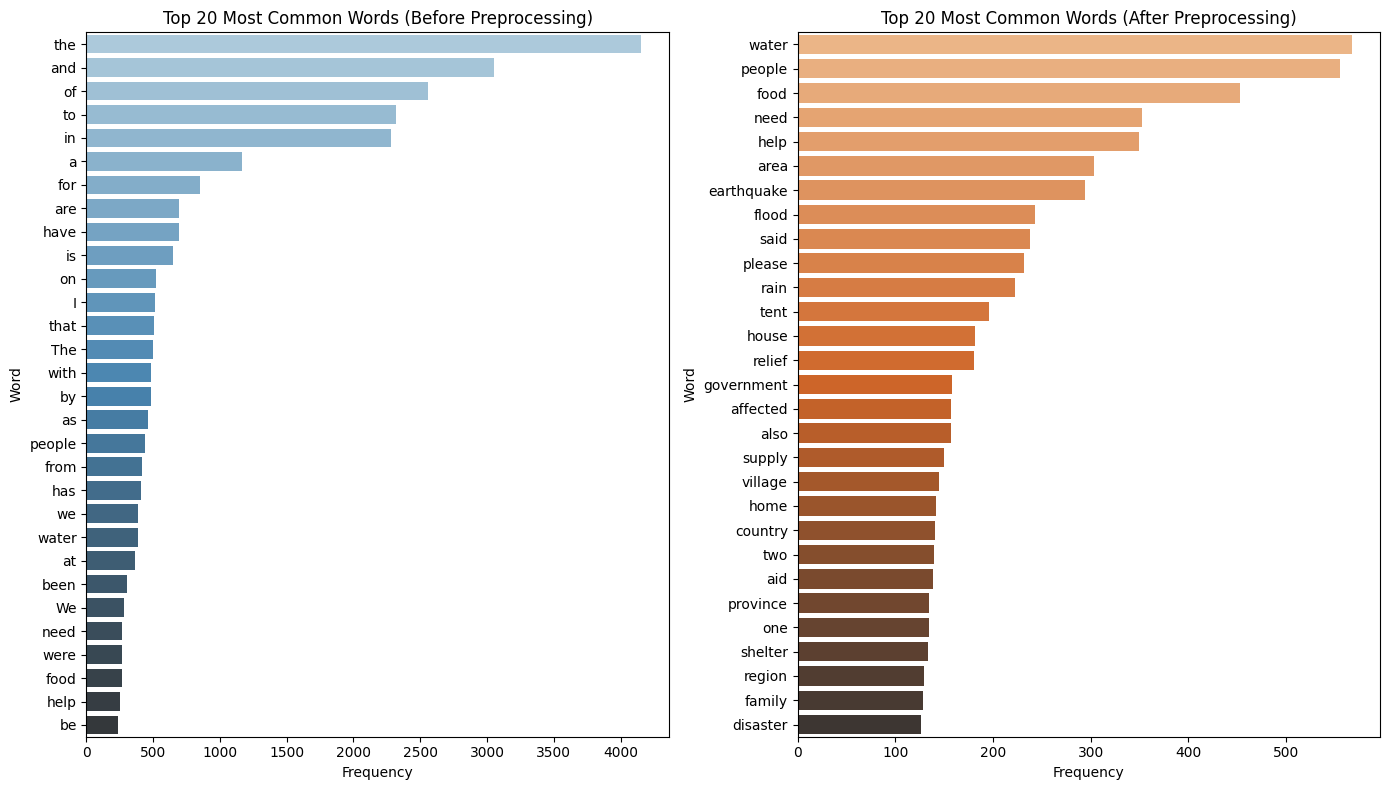


Sample processed text:
                                                 message  \
11669  MUZAFFARABAD, Mar 6 (APP): Pak-Turk Foundation...   
14110  With brutal winter weather now engulfing Pakis...   
6019   I send my hughs to all the chilian's soldiers ...   
19759  The British Red Cross has already allocated ¬¨...   
10712  A convoy of commercial trucks carrying about 8...   

                                          processed_text  
11669  muzaffarabad mar app pakturk foundation spendi...  
14110  brutal winter weather engulfing pakistan earth...  
6019   send hughs chilians soldier lost family last e...  
19759  british red cross already allocated ¬¨¬£ disas...  
10712  convoy commercial truck carrying metric tonne ...  


In [2]:
import torch
import pandas as pd
import numpy as np
from datasets import load_dataset, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.utils import shuffle

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For removing stopwords
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # For WordNet support (optional)
nltk.download('punkt_tab')

# Load the dataset
dataset = load_dataset("community-datasets/disaster_response_messages")
df = dataset['train'].to_pandas()

# Display initial dataset info
print(f"Dataset Info:\n{df.info()}")
print(f"Sample Data:\n{df.head()}")

# Extract features (messages) and labels
X = df["message"]
label_columns = [col for col in df.columns if df[col].dtype == "int64"]
y = df[label_columns]

# Count the number of samples for each label
label_counts = y.sum(axis=0)

# Remove labels with count 0
non_zero_labels = label_counts[label_counts > 0].index
df = df[non_zero_labels.tolist() + ["message"]]  # Keep only labels with non-zero counts

# Balance all labels by sampling up to `min_label_count`
min_label_count = label_counts[label_counts > 0].min()
indices_to_keep = []

# Create a list of indices to sample
for label in label_columns:
    label_indices = df[df[label] == 1].index

    if len(label_indices) > min_label_count:
        sampled_indices = np.random.choice(label_indices, min_label_count, replace=False)
    else:
        sampled_indices = label_indices

    indices_to_keep.extend(sampled_indices)

# Remove duplicates from the indices to avoid double-counting samples with multiple labels
indices_to_keep = list(set(indices_to_keep))

# Shuffle the indices to ensure randomization
indices_to_keep = shuffle(indices_to_keep, random_state=42)

# Create the balanced sampled dataset
sampled_df = df.loc[indices_to_keep]

# Verify the label distribution in the sampled dataset
sampled_label_counts = sampled_df[label_columns].sum(axis=0)

# Display original and sampled label counts
print("Original label counts:\n", label_counts)
print("\nSampled label counts:\n", sampled_label_counts)

# Visualize the label distribution before and after sampling
plt.figure(figsize=(12, 6))

# Plot original label distribution
plt.subplot(1, 2, 1)
label_counts.plot(kind="bar", title="Original Label Distribution", color="skyblue")

# Plot sampled label distribution
plt.subplot(1, 2, 2)
sampled_label_counts.plot(kind="bar", title="Balanced Label Distribution", color="lightcoral")

plt.tight_layout()
plt.show()

df = sampled_df.copy()

# Define preprocessing functions
def clean_text(text):
    """Removes unwanted characters, punctuation, and extra spaces."""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove mentions
    text = re.sub(r"#\w+", "", text)    # Remove hashtags
    text = text.lower()                 # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)     # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

def tokenize_and_lemmatize(text):
    """Tokenizes and lemmatizes the text."""
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    # Filter stopwords and informal words like "u"
    stop_words = set(stopwords.words('english'))
    # Add informal words to stopwords to prevent them from appearing in the top common words
    informal_words = {"u", "ur", "you", "y", "i", "im", "ive", "u'd", "u'll", "u're"}
    stop_words.update(informal_words)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Preprocessing pipeline
print("\nPreprocessing data...")
df['cleaned_text'] = df['message'].apply(clean_text)
df['processed_text'] = df['cleaned_text'].apply(tokenize_and_lemmatize)

# Visualizing preprocessing results
print("\nGenerating visualizations...")

# Wordcloud of raw text
raw_text = " ".join(df['message'])
cleaned_text = " ".join(df['processed_text'])

plt.figure(figsize=(16, 8))

# Raw WordCloud
plt.subplot(1, 2, 1)
wordcloud_raw = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Raw Text")

# Processed WordCloud
plt.subplot(1, 2, 2)
wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Processed Text")

plt.tight_layout()
plt.show()

# Distribution of text lengths before and after preprocessing
df['text_length_raw'] = df['message'].apply(lambda x: len(x.split()))
df['text_length_cleaned'] = df['processed_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(df['text_length_raw'], color='blue', label='Raw Text', kde=True, stat="density")
sns.histplot(df['text_length_cleaned'], color='orange', label='Processed Text', kde=True, stat="density")
plt.legend()
plt.title("Distribution of Text Lengths (Before vs After Preprocessing)")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()

# Most common words before preprocessing
word_counts_raw = Counter(" ".join(df['message']).split())
most_common_words_raw = pd.DataFrame(word_counts_raw.most_common(30), columns=['Word', 'Frequency'])

# Most common words after preprocessing
word_counts_processed = Counter(" ".join(df['processed_text']).split())
most_common_words_processed = pd.DataFrame(word_counts_processed.most_common(30), columns=['Word', 'Frequency'])
most_common_words_processed = most_common_words_processed[most_common_words_processed['Word'] != 'u']
# Plotting before vs after preprocessing
plt.figure(figsize=(14, 8))

# Raw text word counts
plt.subplot(1, 2, 1)
sns.barplot(data=most_common_words_raw, x='Frequency', y='Word', palette='Blues_d')
plt.title("Top 20 Most Common Words (Before Preprocessing)")

# Processed text word counts
plt.subplot(1, 2, 2)
sns.barplot(data=most_common_words_processed, x='Frequency', y='Word', palette='Oranges_d')
plt.title("Top 20 Most Common Words (After Preprocessing)")

plt.tight_layout()
plt.show()

# Display sample processed text
print("\nSample processed text:")
print(df[['message', 'processed_text']].head())

# Remove unwanted columns
df = df.drop(columns=['text_length_raw', 'text_length_cleaned'])

# Binarize labels for multi-label classification
label_columns = [col for col in df.columns if df[col].dtype == "int64"]
y = df[label_columns]
mlb = MultiLabelBinarizer()
y_binarized = np.array([list(row) for row in y.values])


In [3]:
# Now align the sampled features and labels
X_sampled = df["processed_text"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_binarized, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 2246, Test samples: 562


In [6]:
# Load Tokenizer and Preprocess Input for BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(texts, labels=None):
    tokens = tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
    if labels is not None:
        tokens["labels"] = torch.tensor(labels, dtype=torch.float32)
    return tokens

# Apply tokenizer
train_tokens = tokenize_data(X_train, y_train)
test_tokens = tokenize_data(X_test, y_test)

train_dataset = Dataset.from_dict({
    'input_ids': train_tokens['input_ids'],
    'attention_mask': train_tokens['attention_mask'],
    'labels': train_tokens['labels']
})

test_dataset = Dataset.from_dict({
    'input_ids': test_tokens['input_ids'],
    'attention_mask': test_tokens['attention_mask'],
    'labels': test_tokens['labels']
})

# Load BERT Model and Train for Multi-Label Classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y_train.shape[1])

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=35,  # Reduced epochs for quick training
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions > 0.5  # Apply a threshold
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
print('Starting Training ...')
trainer.train()

# Optional: Save the trained model
trainer.save_model("disaster_response_bert_model")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Starting Training ...


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.354000,0.352203,0.000000,0.353947
2,0.329300,0.319070,0.007117,0.435666
3,0.316000,0.303868,0.028470,0.463841
4,0.284800,0.291645,0.044484,0.535140
5,0.250300,0.278788,0.065836,0.563240
6,0.230400,0.276031,0.062278,0.572358
7,0.205400,0.276519,0.094306,0.624905
8,0.166600,0.274800,0.104982,0.636404
9,0.141800,0.277306,0.099644,0.648360
10,0.122100,0.280873,0.117438,0.656413


In [7]:
# Step 6: Evaluate the Classification Model
predictions = trainer.predict(test_dataset)
predicted_labels = (predictions.predictions > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, predicted_labels, target_names=label_columns))

# Visualize some classification results
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    print(f"\nOriginal Message: {X_test.iloc[idx]}")
    print(f"True Labels: {', '.join([label_columns[j] for j, val in enumerate(y_test[idx]) if val == 1])}")
    print(f"Predicted Labels: {', '.join([label_columns[j] for j, val in enumerate(predicted_labels[idx]) if val == 1])}")




Classification Report:
                        precision    recall  f1-score   support

               related       1.00      1.00      1.00       562
               request       0.79      0.71      0.75       162
           aid_related       0.91      0.88      0.90       461
          medical_help       0.72      0.38      0.50       107
      medical_products       0.58      0.25      0.35        73
     search_and_rescue       0.00      0.00      0.00        59
              security       0.00      0.00      0.00        34
              military       0.95      0.56      0.70        36
                 water       0.90      0.73      0.81        88
                  food       0.86      0.80      0.83       123
               shelter       0.83      0.63      0.72       125
              clothing       1.00      0.18      0.31        33
                 money       0.85      0.28      0.42        40
        missing_people       0.00      0.00      0.00        25
              r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Integrating Generative AI

Integrated Gen ai to explain the outputs of BertForSequenceClassification

In [9]:
# Step 7: Use Generative AI Model for Actionable Outputs
# Load a generative AI model (T5)
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

gen_tokenizer = AutoTokenizer.from_pretrained("t5-small")
gen_model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Define a function for generative output
def generate_actionable_text(classified_labels, message):
    # Convert labels back to their column names
    active_labels = [label_columns[i] for i, val in enumerate(classified_labels) if val == 1]
    prompt = (
        f"Message: {message}\n"
        f"Detected Categories: {', '.join(active_labels)}\n"
        f"Generate an actionable response:"
    )
    inputs = gen_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = gen_model.generate(inputs["input_ids"], max_length=100, num_beams=3)
    return gen_tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example: Generate response for a test sample
print("\nGenerating responses for sample test cases...")
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    message = X_test.iloc[idx]
    labels = predicted_labels[idx]
    response = generate_actionable_text(labels, message)
    print(f"\nOriginal Message: {message}")
    print(f"Detected Categories: {', '.join([label_columns[j] for j, val in enumerate(labels) if val == 1])}")
    print(f"Generated Response: {response}")
    print("-" * 50)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


Generating responses for sample test cases...

Original Message: people evacuated four state many returned home floodwaters receded area
Detected Categories: related, aid_related, refugees, weather_related, floods
Generated Response: Message: people evacuated four state many returned home floodwaters receded area Detected Categories: related, aid_related, refugees, weather_related, floods Generate an actionable response:
--------------------------------------------------

Original Message: important worki finished schooli study electricityelectronic informatic never find job
Detected Categories: related
Generated Response: Message: important worki finished schooli study electricityelectronic informatic never find job Detected Categories: related Generate an actionable response:
--------------------------------------------------

Original Message: would like know happening country
Detected Categories: related, request, weather_related, direct_report
Generated Response: Message: would l

In [ ]:
# Step 7: Use Generative AI Model for Actionable Outputs
# Load a generative AI model (T5)
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM

# Load the tokenizer and model
gen_tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-1.7B-Instruct")
gen_model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM2-1.7B-Instruct")

# Define a function for generative output
def generate_actionable_text(classified_labels, message):
    # Convert labels back to their column names
    active_labels = [label_columns[i] for i, val in enumerate(classified_labels) if val == 1]
    if not active_labels:
        active_labels = ["No categories identified"]  # Handle case when no categories are detected

    # Craft the structured prompt
    prompt = (
        f"Message: {message}\n"
        f"Categories: {', '.join(active_labels)}\n\n"
        f"Use the above message and identified categories from my model to explain what the labels are saying about the message. "
    )

    # Tokenize and generate output
    inputs = gen_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = gen_model.generate(
        inputs["input_ids"],
        max_length=150,
        temperature=0.5,  # Add creativity
    )
    return gen_tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example: Generate response for a test sample
print("\nGenerating responses for sample test cases...")
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    message = X_test.iloc[idx]
    labels = predicted_labels[idx]
    response = generate_actionable_text(labels, message)

    print(f"\nOriginal Message: {message}")
    print(f"Detected Categories: {', '.join([label_columns[j] for j, val in enumerate(labels) if val == 1])}")
    print(f"Generated Response: {response}")
    print("-" * 50)
